In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import h5py, os

import powerbox as pbox

In [ ]:
from utils.data_reader import readH5_PLUTO

In [ ]:
from Kea.Kea.statistics.spectra.per_spectra import modal_spectrum

# Data

In [2]:
output_dir = "/home/yangelaxue/Documents/VUW/pluto_runs/Test 3D/"

# Save plots and movies

In [3]:
save_dir = os.path.join(output_dir,"visualisation")

if not os.path.exists(save_dir):
    os.mkdir(save_dir)

# Process Data

In [4]:
def getH5_names(output_dir):

    f_names = [f_name for f_name in os.listdir(output_dir) if f_name.endswith('.dbl.h5')]
    f_nums = np.sort([int(f_name[5:9]) for f_name in f_names])
    sorted_f_names = [f'data.{('000'+str(f_num))[-4:]}.dbl.h5' for f_num in f_nums]

    return sorted_f_names

In [5]:
def readH5_PLUTO(f_name, *var):

    out = []

    f = h5py.File(f_name, 'r')

    for _var in var:
        if _var in ['rho', 'prs', 'vx1', 'vx2', 'vx3', 'Bx1', 'Bx2', 'Bx3']:
            out.append(np.array(f[list(f.keys())[0]]['vars'][_var]))
        elif _var in ['X', 'Y', 'Z']:
            out.append(np.array(f['cell_coords'][_var]))
        else:
            print(f'Invalid variable name: {_var}')
            out.append(0)

    return out

In [6]:
def animate_vars(X, Y, var_list, var_name, save_dir=save_dir, cmap="magma"):

    vmin, vmax = np.min(var_list), np.max(var_list)
    
    fig, ax = plt.subplots(1,1,figsize=(6,6),tight_layout=True)
    
    ax.set_aspect('equal')
    
    ax.set_title(f"{var_name}")
    
    ims = []
    for i in range(len(var_list)):
        mesh = ax.pcolormesh(X, Y, var_list[i], animated=True, cmap=cmap, vmin=vmin, vmax=vmax)
        ims.append([mesh])
    
    fig.colorbar(mesh,shrink=.8)
    
    # ims = [ax.imshow(plt.imread(os.path.join(image_dir,image_fname)), animated=True) for image_fname in image_fnames_sorted]
    
    ani = animation.ArtistAnimation(fig, ims, interval=300)
    ani.save(os.path.join(save_dir,f"{var_name}.mp4"),dpi=150)

In [7]:
def animate_vfield(var_name, intv=4, save_dir=save_dir):
    
    fig, ax = plt.subplots(1,1,figsize=(6,6),tight_layout=True)
    
    ax.set_aspect('equal')
    
    ax.set_title(f"{var_name}")
    
    ims = []
    for i in range(len(vx1_list)):
        im = ax.quiver(X[::intv,::intv], Y[::intv,::intv], vx1_list[i][::intv,::intv] ,vx2_list[i][::intv,::intv], animated=True)
        ims.append([im])
    
    fig.colorbar(im,shrink=.8)
    
    # ims = [ax.imshow(plt.imread(os.path.join(image_dir,image_fname)), animated=True) for image_fname in image_fnames_sorted]
    
    ani = animation.ArtistAnimation(fig, ims, interval=300)
    ani.save(os.path.join(save_dir,f"{var_name}.mp4"),dpi=150)

In [10]:
f_names = getH5_names(output_dir)[::2]
f_names

['data.0000.dbl.h5',
 'data.0002.dbl.h5',
 'data.0004.dbl.h5',
 'data.0006.dbl.h5',
 'data.0008.dbl.h5',
 'data.0010.dbl.h5',
 'data.0012.dbl.h5',
 'data.0014.dbl.h5',
 'data.0016.dbl.h5',
 'data.0018.dbl.h5',
 'data.0020.dbl.h5',
 'data.0022.dbl.h5',
 'data.0024.dbl.h5',
 'data.0026.dbl.h5',
 'data.0028.dbl.h5',
 'data.0030.dbl.h5',
 'data.0032.dbl.h5',
 'data.0034.dbl.h5',
 'data.0036.dbl.h5',
 'data.0038.dbl.h5',
 'data.0040.dbl.h5',
 'data.0042.dbl.h5',
 'data.0044.dbl.h5',
 'data.0046.dbl.h5',
 'data.0048.dbl.h5',
 'data.0050.dbl.h5',
 'data.0052.dbl.h5',
 'data.0054.dbl.h5',
 'data.0056.dbl.h5',
 'data.0058.dbl.h5',
 'data.0060.dbl.h5',
 'data.0062.dbl.h5',
 'data.0064.dbl.h5',
 'data.0066.dbl.h5',
 'data.0068.dbl.h5']

In [11]:
X, Y, Z = readH5_PLUTO(os.path.join(output_dir,f_names[0]), 'X', 'Y', 'Z')

In [14]:
# rho_list = [readH5_PLUTO(os.path.join(output_dir,f_name), 'rho')[0] for f_name in f_names]
vx1_list = [readH5_PLUTO(os.path.join(output_dir,f_name), 'vx1')[0] for f_name in f_names]
vx2_list = [readH5_PLUTO(os.path.join(output_dir,f_name), 'vx2')[0] for f_name in f_names]
vx3_list = [readH5_PLUTO(os.path.join(output_dir,f_name), 'vx3')[0] for f_name in f_names]

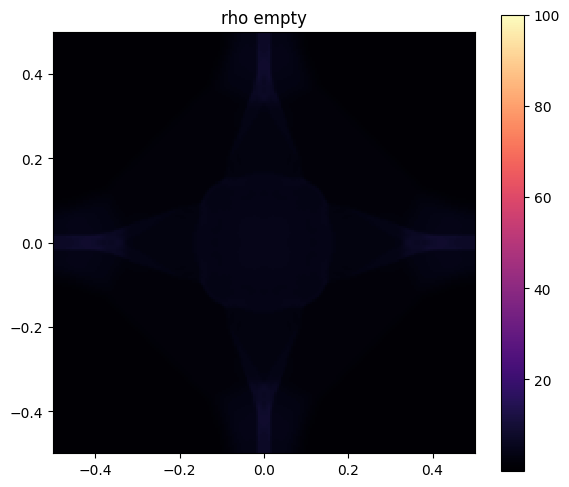

In [13]:
animate_vars(X[100], Y[100], [rho[100] for rho in rho_list], "rho empty")
# animate_vars(vx1_list, "vx1 pbturb", cmap="bwr")
# animate_vars(vx2_list, "vx2 pbturb", cmap="bwr")

In [41]:
v_list = [(vx1**2 + vx2**2 + vx3**2)**.5 for vx1,vx2,vx3 in zip(vx1_list,vx2_list,vx3_list)]

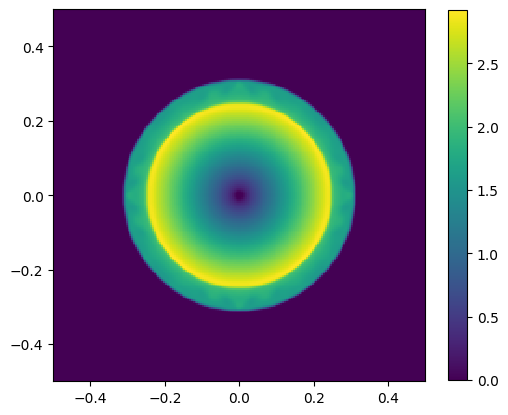

In [50]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

t_idx = 9

im = ax.pcolormesh(X[100], Y[100], v_list[t_idx][100])
ax.set_aspect('equal')

fig.colorbar(im,shrink=.8)

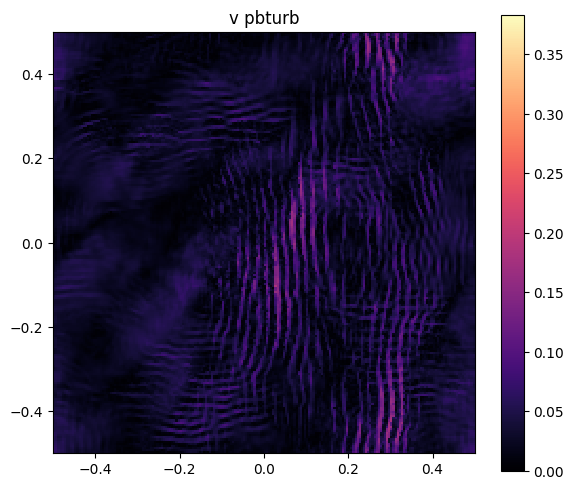

In [80]:
animate_vars(v_list, "v pbturb")

/home/yangelaxue/clusters/lib/python3.12/site-packages/matplotlib/quiver.py:695: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/yangelaxue/clusters/lib/python3.12/site-packages/matplotlib/quiver.py:695: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


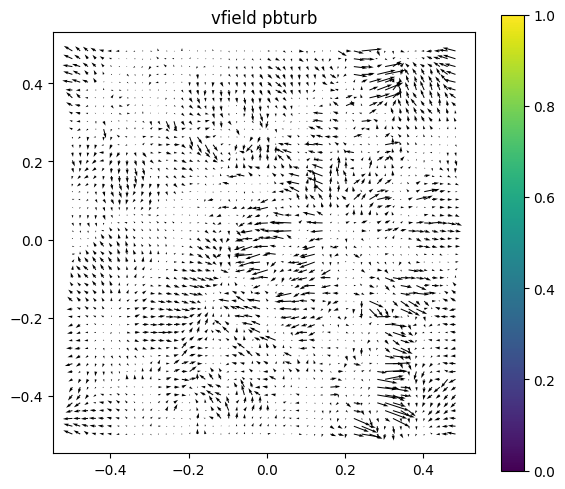

In [81]:
animate_vfield("vfield pbturb", intv=4)

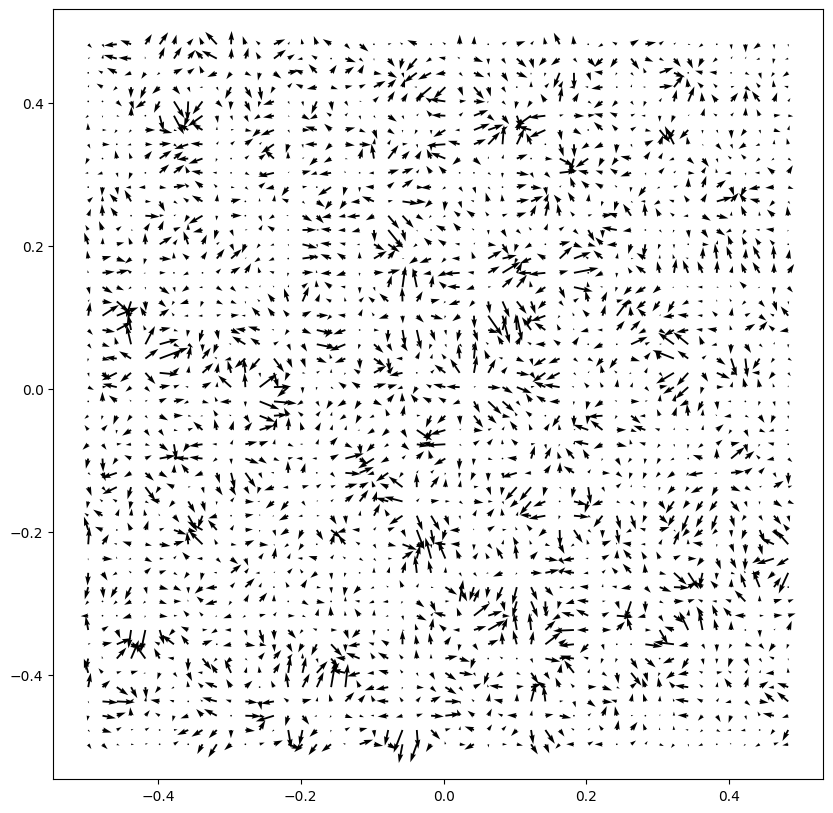

In [49]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

intv = 4

ax.quiver(X[::intv,::intv], Y[::intv,::intv], vx1_list[2][::intv,::intv], vx2_list[2][::intv,::intv])
ax.set_aspect('equal')


In [ ]:
p_k_field, bins_field = pbox.get_power(rho_list[0], 1)

fig, ax = plt.subplots()

ax.set_yscale('log')
ax.set_xscale('log')

line, = ax.plot(bins_field, p_k_field)
ax.plot(bins_field, bins_field**(-11/3), label="Kolmogorov")

def animate_power_spectrum(i):
    p_k_field_line = pbox.get_power(rho_list[i], 1)[0]
    line.set_ydata(p_k_field_line)  # update the data.
    return line,


ani = animation.FuncAnimation(fig, animate_power_spectrum, interval=len(rho_list),save_count=len(rho_list))

# To save the animation, use e.g.
#
ani.save("movie.mp4",dpi=150)
    
# plt.plot(bins_field, p_k_field)



In [ ]:
plt.pcolormesh(X, Y, rho, cmap='magma')
plt.colorbar()

plt.gca().set_aspect(1)

In [ ]:
kvec, Bx1_fft = modal_spectrum(Bx1, lenn=[2*np.pi,2*np.pi])

In [ ]:
Bx1_fft.shape

In [ ]:
plt.pcolormesh(kvec[0], kvec[1], Bx1_fft.real, cmap='magma')
plt.colorbar()

plt.gca().set_aspect(1)

In [ ]:
kvec